In [2]:
from keras.models import Sequential
import numpy as np
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
import matplotlib.pyplot as plt
import random

# Conv2D for 2-Dimensional observations like images
# MaxPooling2D is for down sampling
# Dense is for fully connected layers
# Flatten is to flatten multi-Dimensional vector to single-Dimensional vector
# matplotlib to display the image

In [4]:
# Loading data set using numpy
from google.colab import drive
drive.mount("/content/drive")

data_path = "/content/drive/My Drive/Colab Notebooks/CNN/"
x_train = np.loadtxt(data_path + 'input.csv', delimiter = ',')
y_train = np.loadtxt(data_path + 'labels.csv', delimiter = ',')

x_test = np.loadtxt(data_path + 'input_test.csv', delimiter = ',')
y_test = np.loadtxt(data_path + 'labels_test.csv', delimiter = ',')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
print("shape of 'x' train data:", x_train.shape)
print("shape of 'y' train data:", y_train.shape)
print("shape of 'x' test data:", x_test.shape)
print("shape of 'y' test data:", y_test.shape)
# no of images present in the test and train datasets(in X_train -> 2000 images, x_test -> 400 images)
# every image of size 100x100 pixel and 3 for RGB channel -> 30000

shape of 'x' train data: (2000, 30000)
shape of 'y' train data: (2000,)
shape of 'x' test data: (400, 30000)
shape of 'y' test data: (400,)


In [ ]:
# reshaping th image datasets to according to image sizes

x_train = x_train.reshape(len(x_train), 100, 100, 3)
y_train = y_train.reshape(len(y_train), 1)

x_test = x_test.reshape(len(x_test), 100, 100, 3)
y_test = y_test.reshape(len(y_test), 1)

In [ ]:
print("shape of 'x' train data:", x_train.shape)
print("shape of 'y' train data:", y_train.shape)
print("shape of 'x' test data:", x_test.shape)
print("shape of 'y' test data:", y_test.shape)

shape of 'x' train data: (2000, 100, 100, 3)
shape of 'y' train data: (2000, 1)
shape of 'x' test data: (400, 100, 100, 3)
shape of 'y' test data: (400, 1)


In [ ]:
type(x_train)

numpy.ndarray

In [ ]:
x_train[1:]
# the values of the dataset range from 0-255(typical RGB data value range)

array([[[[131., 128., 135.],
         [160., 157., 164.],
         [198., 192., 204.],
         ...,
         [250., 249., 247.],
         [255., 255., 253.],
         [250., 249., 245.]],

        [[140., 137., 144.],
         [127., 124., 131.],
         [120., 114., 124.],
         ...,
         [251., 253., 252.],
         [254., 255., 253.],
         [254., 255., 251.]],

        [[204., 202., 207.],
         [187., 185., 190.],
         [147., 142., 148.],
         ...,
         [249., 255., 255.],
         [238., 247., 242.],
         [232., 241., 236.]],

        ...,

        [[174., 182., 195.],
         [172., 180., 193.],
         [178., 186., 197.],
         ...,
         [ 87., 114.,  97.],
         [ 75.,  99.,  83.],
         [ 80., 105.,  86.]],

        [[166., 173., 189.],
         [164., 172., 185.],
         [172., 180., 193.],
         ...,
         [ 78., 106.,  84.],
         [ 72.,  97.,  76.],
         [ 77., 102.,  81.]],

        [[173., 180., 196.],
       

In [ ]:
# to train the appropriately we have to rescale the values from 0-1, to get the normalised values

x_train = x_train/255
x_test = x_test/255

In [ ]:
x_train[1:]

array([[[[0.51372549, 0.50196078, 0.52941176],
         [0.62745098, 0.61568627, 0.64313725],
         [0.77647059, 0.75294118, 0.8       ],
         ...,
         [0.98039216, 0.97647059, 0.96862745],
         [1.        , 1.        , 0.99215686],
         [0.98039216, 0.97647059, 0.96078431]],

        [[0.54901961, 0.5372549 , 0.56470588],
         [0.49803922, 0.48627451, 0.51372549],
         [0.47058824, 0.44705882, 0.48627451],
         ...,
         [0.98431373, 0.99215686, 0.98823529],
         [0.99607843, 1.        , 0.99215686],
         [0.99607843, 1.        , 0.98431373]],

        [[0.8       , 0.79215686, 0.81176471],
         [0.73333333, 0.7254902 , 0.74509804],
         [0.57647059, 0.55686275, 0.58039216],
         ...,
         [0.97647059, 1.        , 1.        ],
         [0.93333333, 0.96862745, 0.94901961],
         [0.90980392, 0.94509804, 0.9254902 ]],

        ...,

        [[0.68235294, 0.71372549, 0.76470588],
         [0.6745098 , 0.70588235, 0.75686275]

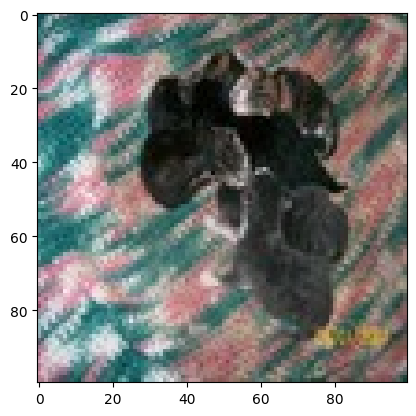

In [ ]:

id = random.randint(0,len(x_train))
# "random.randint()" gives any random integer value in the given range
plt.imshow(x_train[id, : ])
# prints the random images in the given dataset

In [ ]:
# MODEL

In [ ]:
# Convolutional Neural Network

# Sequential- from input to output passes through a series of neural layers, these layers are stacked up in a sequence.
model = Sequential([
    # layers

    # layer1
    Conv2D(32,(3, 3), activation='relu', input_shape = (100,100,3)),
    # conv2D(no of filters, size of the filter, activation function 'relu', what is the shape that our model is expecting(the size of the images))

    # layer2
    MaxPooling2D(2, 2),
    # the size of the filter

    # layer3
    Conv2D(32, (3,3), activation='relu'),
    # input layer is only for the first layer

    Flatten(),

    # fully connected layers
    Dense(64, activation= 'relu'),
    # Dense(no of neurons in that layer, activation function)

    # final fully connected layer/output layer
    # final layer must have same no of neurons as our output class, since it is a binary classification we only need one neuron
    Dense(1, activation = 'sigmoid')
    # since its a binary classification we use sigmoid

])

In [ ]:
# this model can also be dfind as below

# model = Sequential()
# model.add(Conv2D(32,(3, 3), activation='relu', input_shape = (100,100,3)))
# model.add(MaxPooling2D(2, 2))
# model.add(Conv2D(32, (3,3), activation='relu'))
# model.add(Flatten())
# model.add(Dense(64, activation= 'relu'))
# model.add(Dense(1, activation = 'sigmoid'))

In [ ]:
# compiling the model

model.compile(loss= 'binary_crossentropy',optimizer= 'adam', metrics = ['accuracy'])

# (type of loss: since its a binary classification, optimizer adjusts the weights of the network to minimise loss function, metric on which we want to evaluate our model)

In [ ]:
# training of input data is done by 'fit()'

model.fit(x_train, y_train, epochs = 5, batch_size = 64)

# epoch: one iteration over the entire dataset
# if we rerun the 'model.fit()' it will resume the accuracy achieved it won't restart, but if we rerun the 'model.compile()' it will restart from epoch 1.
# batch_size: it will divide the data set into batches and run iterartions epoch times

# example: if there are 10,000 images and we give a batch size of 1000, it'll run for 10 iterations [(10,000/1000)=10], for every epoch it runs 10 iterations with 1000 batches per iteration


Epoch 1/5
32/32 [==============================] - 33s 1s/step - loss: 0.2744 - accuracy: 0.8925
Epoch 2/5
32/32 [==============================] - 28s 890ms/step - loss: 0.1688 - accuracy: 0.9470
Epoch 3/5
32/32 [==============================] - 24s 730ms/step - loss: 0.1136 - accuracy: 0.9675
Epoch 4/5
32/32 [==============================] - 25s 789ms/step - loss: 0.0637 - accuracy: 0.9855
Epoch 5/5
32/32 [==============================] - 38s 1s/step - loss: 0.0332 - accuracy: 0.9950


In [ ]:
# model performance on test dataset
model.evaluate(x_test,y_test)

13/13 [==============================] - 2s 107ms/step - loss: 1.0917 - accuracy: 0.6950


[1.0917421579360962, 0.6949999928474426]

In [ ]:
# the accuracy is very low since the dataset is small and the no of smaples is in train is 2000 and test is 400
# TO DO: INCREASE THE ACCURACY

In [ ]:
# Making Predictions

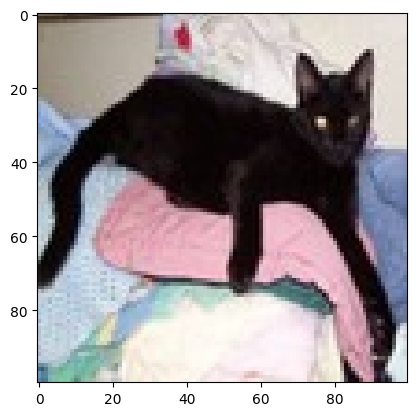

1/1 [==============================] - 0s 26ms/step
[[0.9990029]]
Displayed picture is a: cat


In [ ]:
index = random.randint(0,len(y_test))
plt.imshow(x_test[index, : ])
plt.show()

# Prediction
y_pred = model.predict(x_test[index, : ].reshape(1, 100, 100, 3))
# we pass the same image we are displaying and reshaping it
print(y_pred)

y_pred = y_pred > 0.9

if(y_pred == 0):
  pred = 'dog'
else:
  pred = 'cat'

print('Displayed picture is a:',pred)